In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/sample_data/data.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


# Y Data profiling

In [4]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 5.5 MB/s eta 0:00:00


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Laptop Price Prediction Dataset", explorative= True)

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 42.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.shape

(893, 18)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [8]:
if 'Unnamed: 0.1' in df.columns:
  df.drop(columns=['Unnamed: 0.1'], inplace=True)
if 'Unnamed: 0' in df.columns:
  df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.columns

Index(['brand', 'name', 'price', 'spec_rating', 'processor', 'CPU', 'Ram',
       'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [10]:
df.shape

(893, 16)

# Separate X and y

In [11]:
X = df.drop('price', axis=1)
y = df['price']

In [12]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [13]:
numeric_features

Index(['spec_rating', 'display_size', 'resolution_width', 'resolution_height',
       'warranty'],
      dtype='object')

In [14]:
categorical_features

Index(['brand', 'name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM',
       'ROM_type', 'GPU', 'OS'],
      dtype='object')

# Pipeline


In [15]:
num_transform = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

In [16]:
# For categorical feature
cat_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [19]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transform,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
  )

In [20]:
# Treain Test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# Ensemble - boosting, stacking

In [21]:
# base learner
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor()
reg_gb = GradientBoostingRegressor()

In [22]:
# voting regressor
voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)

In [23]:
# Stacking
stacking_reg = StackingRegressor(
    estimators= [
        ('rf', reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge()  #the meta learner
)

# Model Training

In [24]:
# Dictionary of all model
model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting' : reg_gb,
    'Votng Ensemble' : voting_reg,
    'Stackig Ensemble' : stacking_reg
}

In [25]:
# Training & Evaluation
result = []

for name, model in model_to_train.items():
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model', model)
      ]
  )

  # train & predict
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  #Evaluate
  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

               Model  R2 Score          RMSE           MAE
0  Linear Regression  0.854830  22303.511962  14177.329372
3     Votng Ensemble  0.840956  23344.925884  12839.021108
1      Random Forest  0.806322  25761.705900  13549.072508
4   Stackig Ensemble  0.805497  25816.524190  14478.923033
2  Gradient Boosting  0.799039  26241.575483  15211.130575


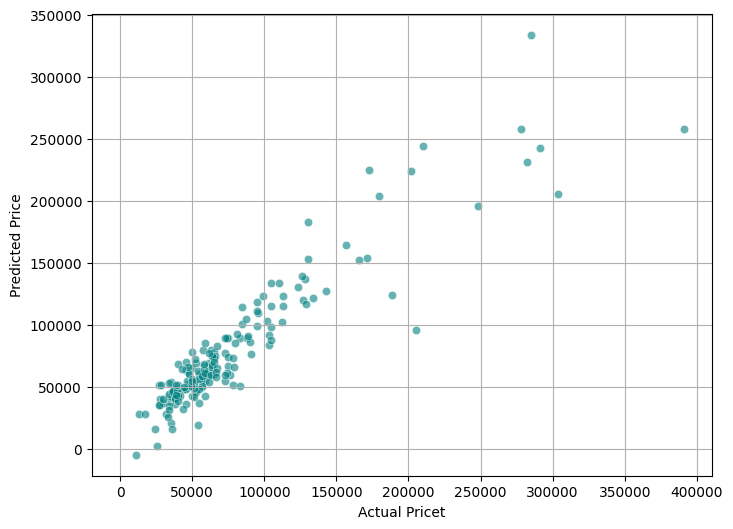

In [28]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]

# fit the best model
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model_obj)
])

final_pipe.fit(X_train, y_train)
y_final_pred = final_pipe.predict(X_test)

#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual Pricet")
plt.ylabel("Predicted Price")

plt.grid(True)
plt.show()